# Bay Area Bike Share Analysis
*This project has 2 version: Vietnamese and English.*

| To understand more: we have this visualizing data by Tablue: https://public.tableau.com/app/profile/tai.le.quang/viz/BayAreaBikeSharing/BussinesStory?publish=yes
> ***[Bay Area Bike Share](http://www.bayareabikeshare.com/) is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.***
> 

This document will guide you in performing an exploratory analysis of the Bay Area Bike Share system. You will learn about the two key stages of data analysis: data wrangling and exploratory data analysis. Before delving into the data, it is important to consider the questions you want to answer about the bike share service. For instance, if you were working for Bay Area Bike Share, what kind of information would you need to make informed business decisions? Alternatively, if you were a user of the bike share service, what factors would affect how you use the service? Answering these questions will help you approach the data analysis process with a clear goal in mind.


In this project, we mainly research to explore the main issues:

- Issue 1: Exploring which ***Subscription type*** is the most use our service.
- Issue 2: Exploring, Statistics of trip durations.
- Issue 3: Analysis of ***Subscription type in weekday***
- Issue 4: Draw plot to describe trend of quantity of visitor through weekday. Which is the day that we have most vistors?

# Data description

> *In 2014, Bay Area Bike Share held an [Open Data Challenge](http://www.bayareabikeshare.com/datachallenge-2014) to encourage data analysts to create visualizations based on their open data set. You’ll create your own visualizations in this project, but first, take a look at the [submission winner for Best Analysis](http://thfield.github.io/babs/index.html) from Tyler Field.*
> 

## Data information

We already have 2 csv file in

- station_data.csv
    - station_id: station ID number (corresponds to "station_id" in "201402_status_data.csv")
    - name: name of station
    - lat: latitude
    - long: longitude
    - dockcount: number of total docks at station
    - landmark: city (San Francisco, Redwood City, Palo Alto, Mountain View, San Jose)
    - installation: date that station was installed
- trip_data.csv
    - Trip ID: numeric ID of bike trip
    - Duration: time of trip in seconds
    - Start Date: start date of trip with date and time, in PST
    - Start Station: station name of start station
    - Start Terminal: numeric reference for start station
    - End Date: end date of trip with date and time, in PST
    - End Station: station name for end station
    - End Terminal: numeric reference for end station
    - Bike #: ID of bike used
    - Subscription Type: Subscriber = annual member; Customer = 24-hour or 3-day member
    - Zip Code: Home zip code of user (only available for annual members)

# Data Wrangling

Now it's time to explore the data. Year 1 and Year 2 data from the Bay Area Bike Share's [Open Data](http://www.bayareabikeshare.com/open-data) page have already been provided with the project 
materials; you don't need to download anything extra.

When dealing with a large amount of data, it can be useful to begin by working with a sample of the data. This makes it easier to verify that our data wrangling steps are functioning properly, as our code will take less time to execute. Once we are confident in our approach, we can then scale up to work on the entire dataset.

To begin your analysis, start by running the first code cell to load all necessary packages and functions. Afterward, execute the second code cell to read a subset of the first trip data file. This will create a new file that contains only the subset of data that we are initially interested in.

In [65]:
# import the necessary library
import csv
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# define 2 variable to save the path file
station_data = 'Database/station_data.csv'
trip_data = 'Database/trip_data.csv'

## Now take a look with station_data

In [67]:
station = pd.read_csv(station_data)
station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [68]:
station.tail()

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [69]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    69 non-null     int64  
 1   name          69 non-null     object 
 2   lat           69 non-null     float64
 3   long          69 non-null     float64
 4   dockcount     69 non-null     int64  
 5   landmark      69 non-null     object 
 6   installation  69 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [70]:
station.nunique()

station_id      69
name            69
lat             68
long            69
dockcount        6
landmark         5
installation    16
dtype: int64

In [71]:
station.isnull().sum()

station_id      0
name            0
lat             0
long            0
dockcount       0
landmark        0
installation    0
dtype: int64

In [72]:
station.describe()

,station_id,lat,long,dockcount
count,69.000000,69.000000,69.000000,69.000000
mean,42.405797,37.593840,-122.223453,17.695652
std,23.822455,0.202682,0.207269,4.026765
min,2.000000,37.329732,-122.418954,11.000000
25%,24.000000,37.390277,-122.400811,15.000000
50%,42.000000,37.771058,-122.388013,15.000000
75%,63.000000,37.788446,-122.081896,19.000000
max,83.000000,37.804770,-121.877349,27.000000


## Now take a look with trip_data

In [73]:
trip = pd.read_csv(trip_data)
trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [74]:
trip.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
144010,198771,385,2/28/2014 22:15,Powell Street BART,39,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404
144011,198772,145,2/28/2014 22:38,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111
144012,198773,677,2/28/2014 22:45,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102
144013,198774,64128,2/28/2014 23:01,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124
144014,198775,570,2/28/2014 23:20,2nd at South Park,64,2/28/2014 23:30,Townsend at 7th,65,577,Subscriber,94107


In [75]:
trip.isnull().sum()

Trip ID                 0
Duration                0
Start Date              0
Start Station           0
Start Terminal          0
End Date                0
End Station             0
End Terminal            0
Bike #                  0
Subscription Type       0
Zip Code             6130
dtype: int64

In [76]:
trip.nunique()

Trip ID              144015
Duration               7983
Start Date            86444
Start Station            69
Start Terminal           69
End Date              85240
End Station              69
End Terminal             69
Bike #                  689
Subscription Type         2
Zip Code               2880
dtype: int64

In [77]:
trip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Trip ID            144015 non-null  int64 
 1   Duration           144015 non-null  int64 
 2   Start Date         144015 non-null  object
 3   Start Station      144015 non-null  object
 4   Start Terminal     144015 non-null  int64 
 5   End Date           144015 non-null  object
 6   End Station        144015 non-null  object
 7   End Terminal       144015 non-null  int64 
 8   Bike #             144015 non-null  int64 
 9   Subscription Type  144015 non-null  object
 10  Zip Code           137885 non-null  object
dtypes: int64(5), object(6)
memory usage: 12.1+ MB


## Summarizing data

We have encountered a problem where the data contained in two files has many fields that we do not need to use. This issue is causing difficulties in analyzing the data. Therefore, we require a summary file that will remove the unnecessary columns.

To simplify the process of dealing with a certain problem, I took the initiative to create a Python class that would help us analyze data from 'trip_data.csv' and 'station_data.csv'. By implementing this class, we can now easily draw insights from the data and generate a more concise summary in a new file named 'trip_summarised.csv'. This new file, along with all other relevant files and data, is safely stored within the 'Database' folder. This will not only save us time but also allow us to better understand the data, and make more informed decisions based on the insights we gain from it.

In [78]:
# summarizing data from trip_data and write it into a new file
import function_help
trip_summarised_data = 'Database/trip_summarised.csv'
function_help.summarise_data(trip_data,station_data,trip_summarised= trip_summarised_data)

function_help.call_summarise_func()
trip_summarised = pd.read_csv(trip_summarised_data)
trip_summarised.head()


,tripID,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,4576,1.050000,2013-08-29,2013,8,14,Thursday,San Francisco,San Francisco,Subscriber
1,4607,1.166667,2013-08-29,2013,8,14,Thursday,San Jose,San Jose,Subscriber
2,4130,1.183333,2013-08-29,2013,8,10,Thursday,Mountain View,Mountain View,Subscriber
3,4251,1.283333,2013-08-29,2013,8,11,Thursday,San Jose,San Jose,Subscriber
4,4299,1.383333,2013-08-29,2013,8,12,Thursday,San Francisco,San Francisco,Subscriber


In [79]:
trip_summarised.tail()

,tripID,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
144010,198771,6.416667,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
144011,198772,2.416667,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
144012,198773,11.283333,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
144013,198774,1068.800000,2014-02-28,2014,2,23,Friday,San Francisco,San Francisco,Customer
144014,198775,9.500000,2014-02-28,2014,2,23,Friday,San Francisco,San Francisco,Subscriber


# ****Exploratory Data Analysis****

First, we want to gather statistics on 'duration'. Based on that, we will know what we need to do with another proble
m.

In [80]:
import statistics

In [81]:
duration_statistics= pd.DataFrame({'Average': statistics.mean(trip_summarised['duration']),
'Median':statistics.median_low(trip_summarised['duration']),
' Multi mode':statistics.multimode(trip_summarised['duration']),
 })
duration_statistics

,Average,Median,Multi mode
0,20.515169,8.85,6.05


****Conclusions:****
- There are more than 144000 trips from **August/2013** to **February/2014**
  
- `The average duration of trips is 20.515169 minutes.`

- `The median trip duration is 8.85 minutes.`

- `People most make a trip in 6.05 minutes.`

And the average trip duration is larger than the median trip duration (the point where 50% of trips are shorter, and 50% are longer).

***Let's begin by examining how those trips are distributed by subscription type. The following expression will display the number of customers and subscriber trips taken. Give it a try!***

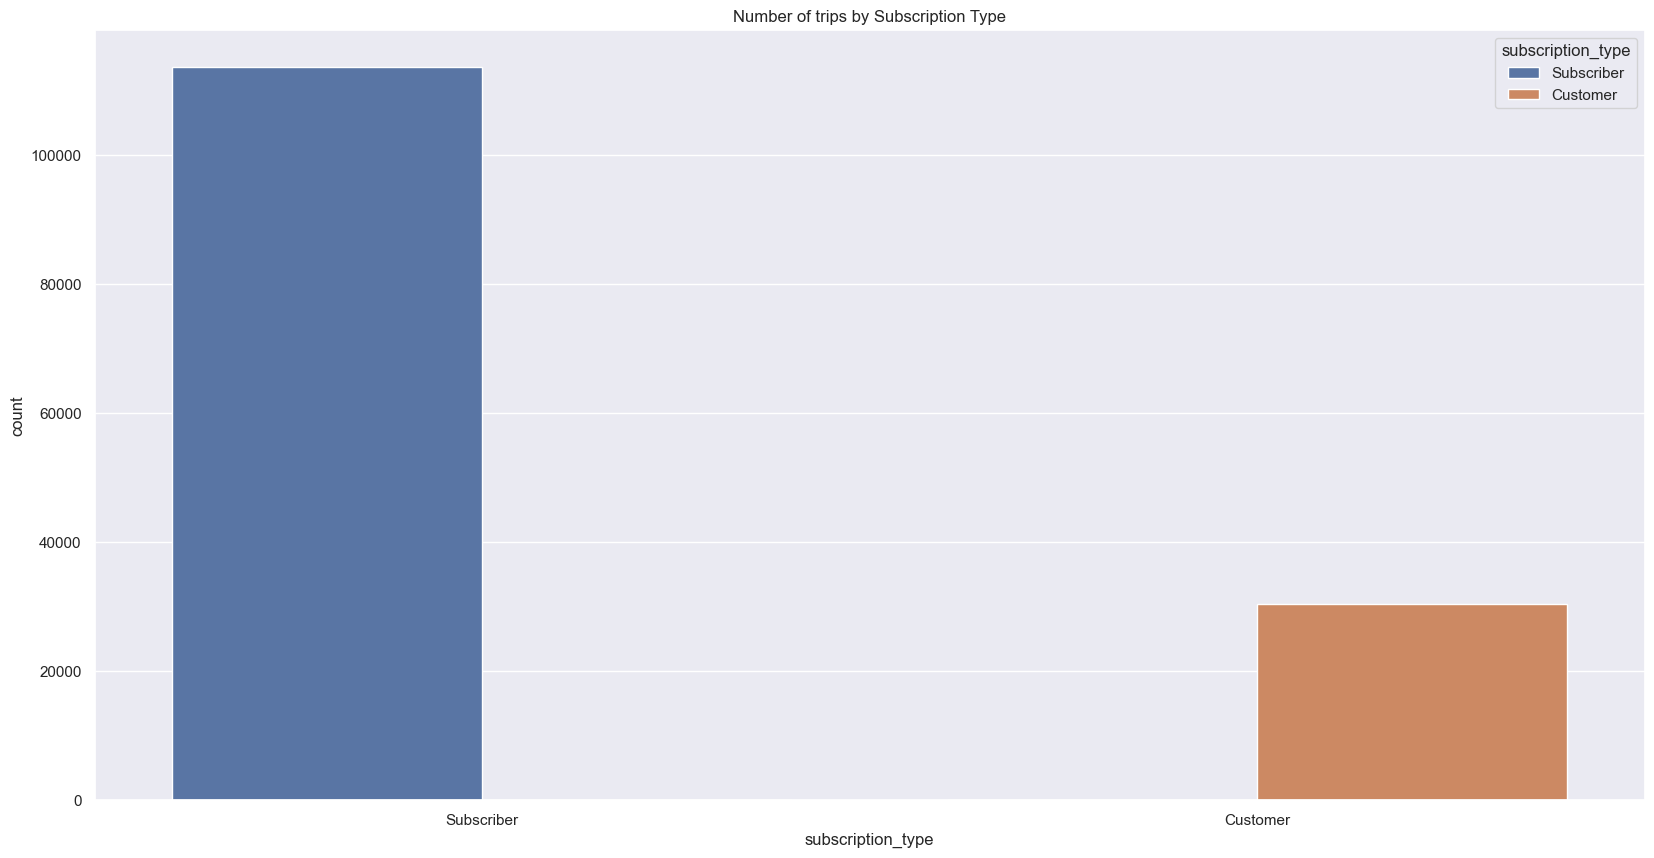

In [82]:
sns.countplot(x = trip_summarised['subscription_type'],hue = trip_summarised['subscription_type']).set(title = "Number of trips by Subscription Type")
plt.show()

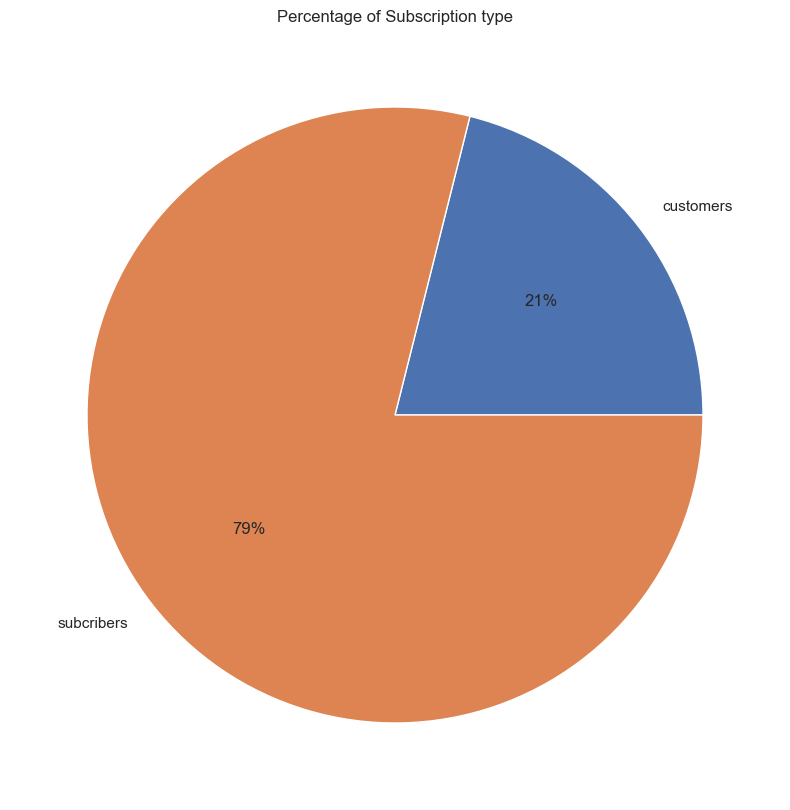

In [83]:
# pie chart of subscription_type
# Subcriber and Customer
#print((trip_summarised['subscription_type'] == "Subscriber").count())
customer_num = (trip_summarised[trip_summarised['subscription_type'] == "Customer"]['tripID']).count()
subscriber_num = (trip_summarised[trip_summarised['subscription_type'] == "Subscriber"]['tripID']).count()

plt.pie(np.array([customer_num,subscriber_num]), labels = ["customers",'subcribers'],autopct='%.0f%%')
plt.title("Percentage of Subscription type")
plt.show()

***Conclusion:***
So now, we are able to answer the issue 1 in the begin.
*The subcription type make most trip in our service is **Subcriber** with 79% of trip*

### ***Now we take a look about quantity of trip depend on City***
#### Start city

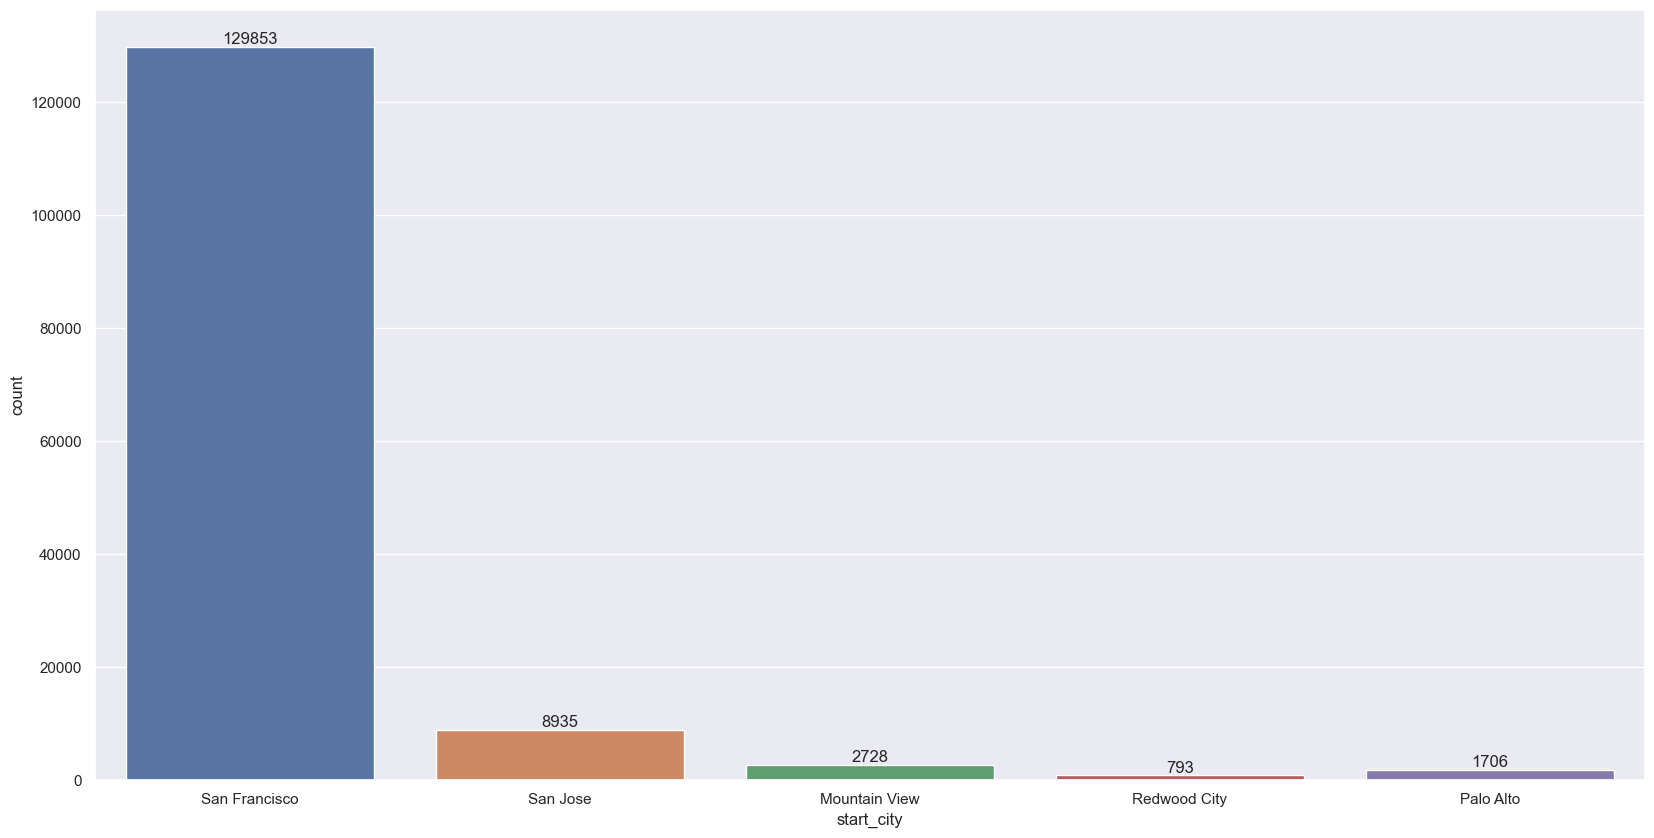

In [84]:
ax = sns.countplot(x=trip_summarised["start_city"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

#### End city

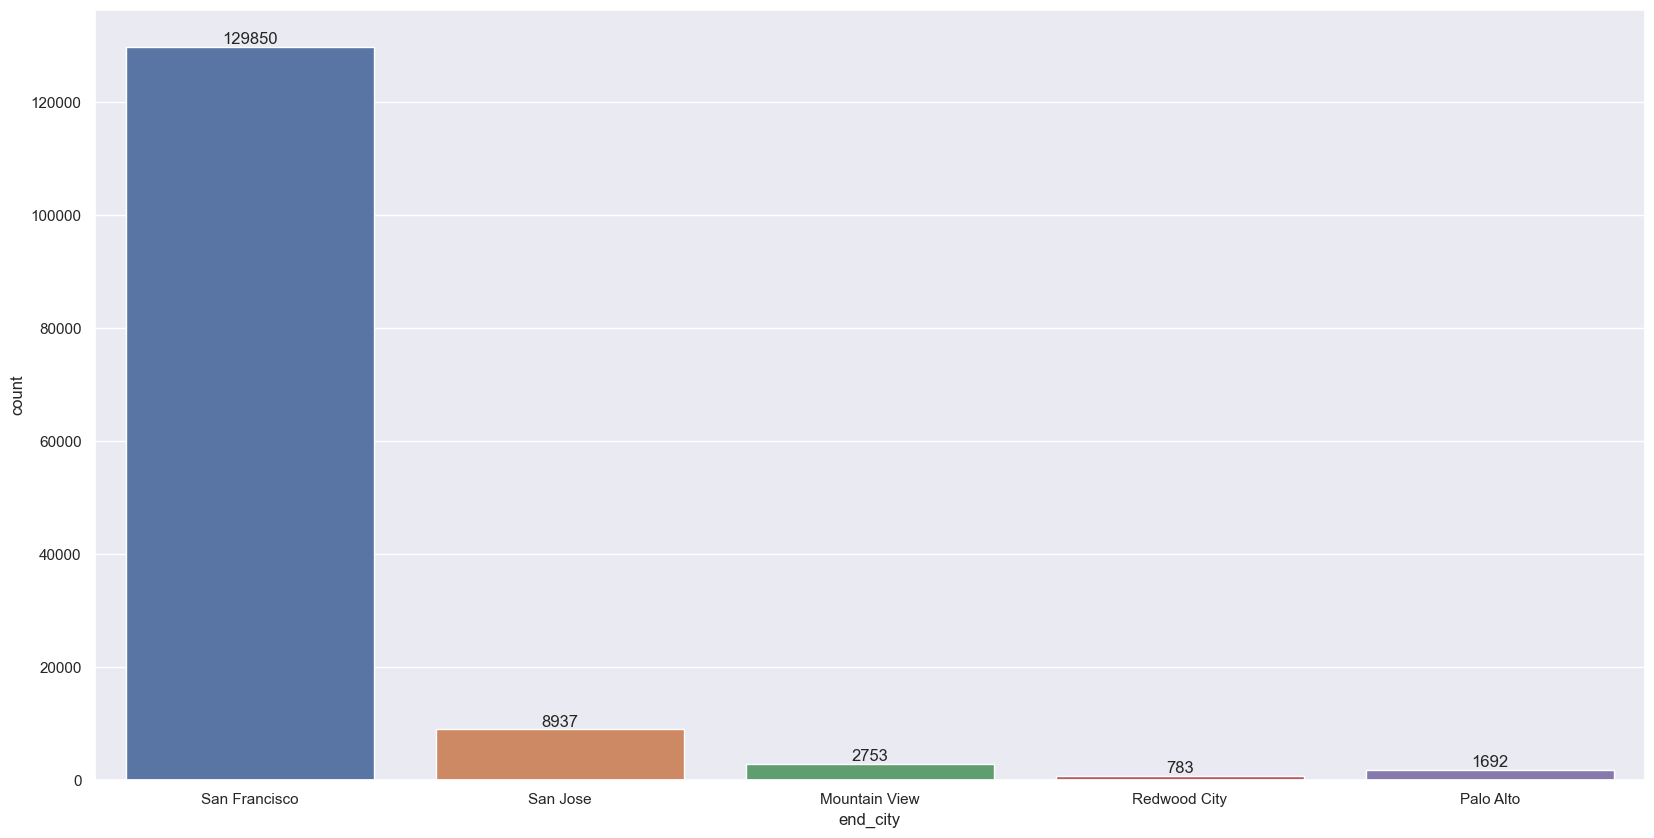

In [85]:
ax = sns.countplot(x=trip_summarised["end_city"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

We can see quantity of trip in 'start_city' and 'end_city' is not the same. 
So we know that people also take our bike to another city. This data below will show us about this:

Total of trip: 144015
Total of trip go to the same city: 143776
Total of trip go to different city: 239


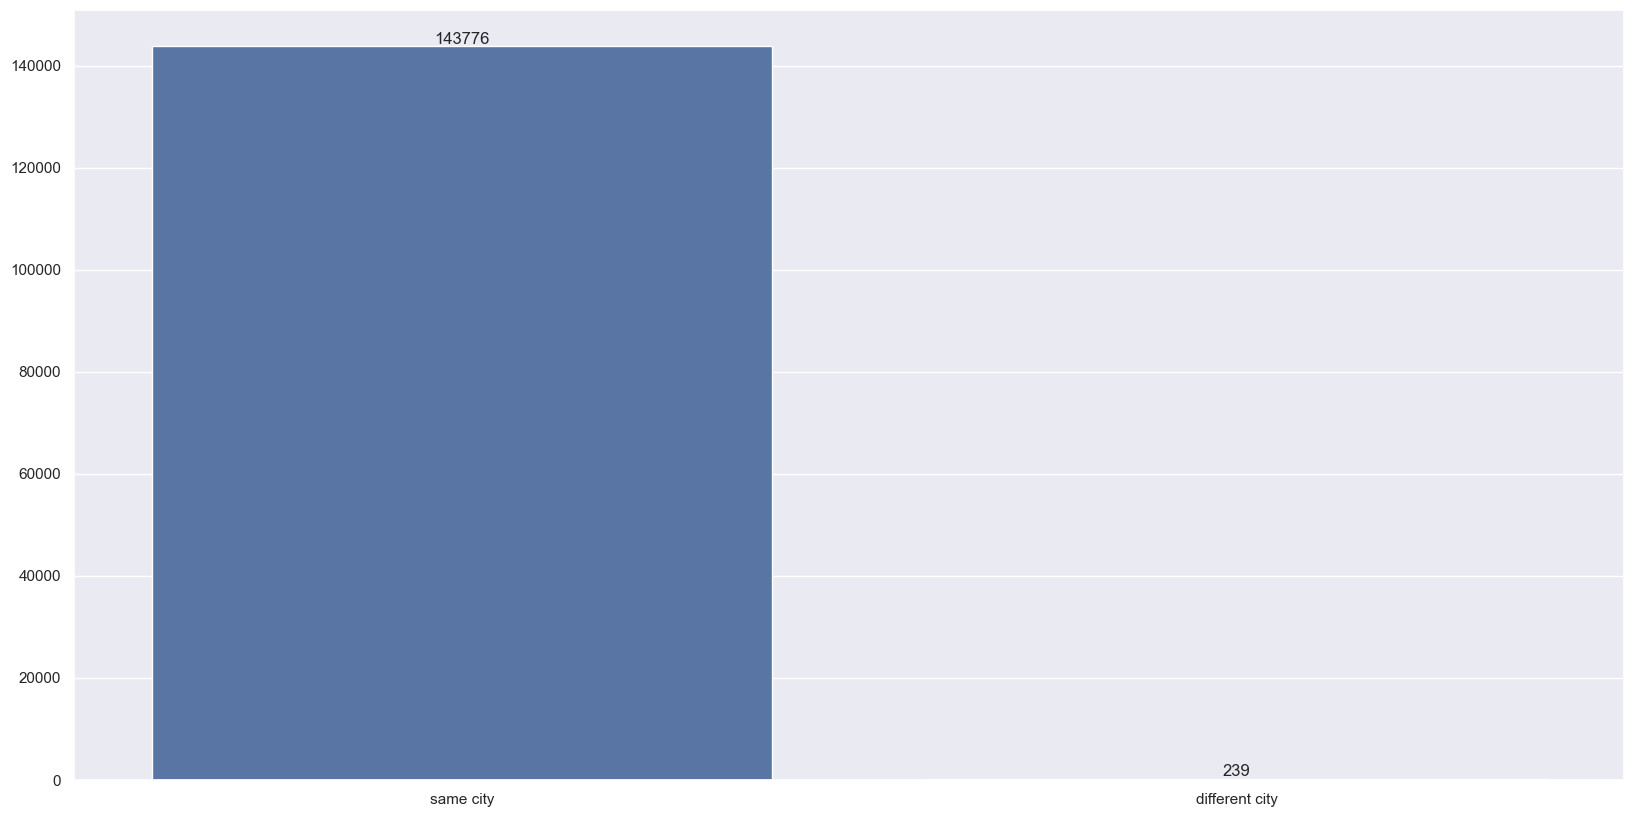

In [86]:
num_of_trip = trip_summarised['tripID'].count()
num_of_trip_to_diffrent_city =trip_summarised[trip_summarised['start_city'] != trip_summarised['end_city']]['tripID'].count()
print("Total of trip: {}".format(num_of_trip))
print("Total of trip go to the same city: {}".format(num_of_trip-num_of_trip_to_diffrent_city))
print("Total of trip go to different city: {}".format(num_of_trip_to_diffrent_city))
new_dict = {}
new_dict['same city'] = num_of_trip-num_of_trip_to_diffrent_city
new_dict['different city'] = num_of_trip_to_diffrent_city
ax = sns.barplot(x=list(new_dict.keys()), y = list(new_dict.values()))
for i in ax.containers:
    ax.bar_label(i,)

## Where is Bay Area Bike Share used?

We wonder where people use our services the most? So check out the chart below to figure it out. The chart below shows the number of people using our motorcycle service across starting locations. Because car hirers taking part in the tour rarely run to another city, we only need to consider the starting position.

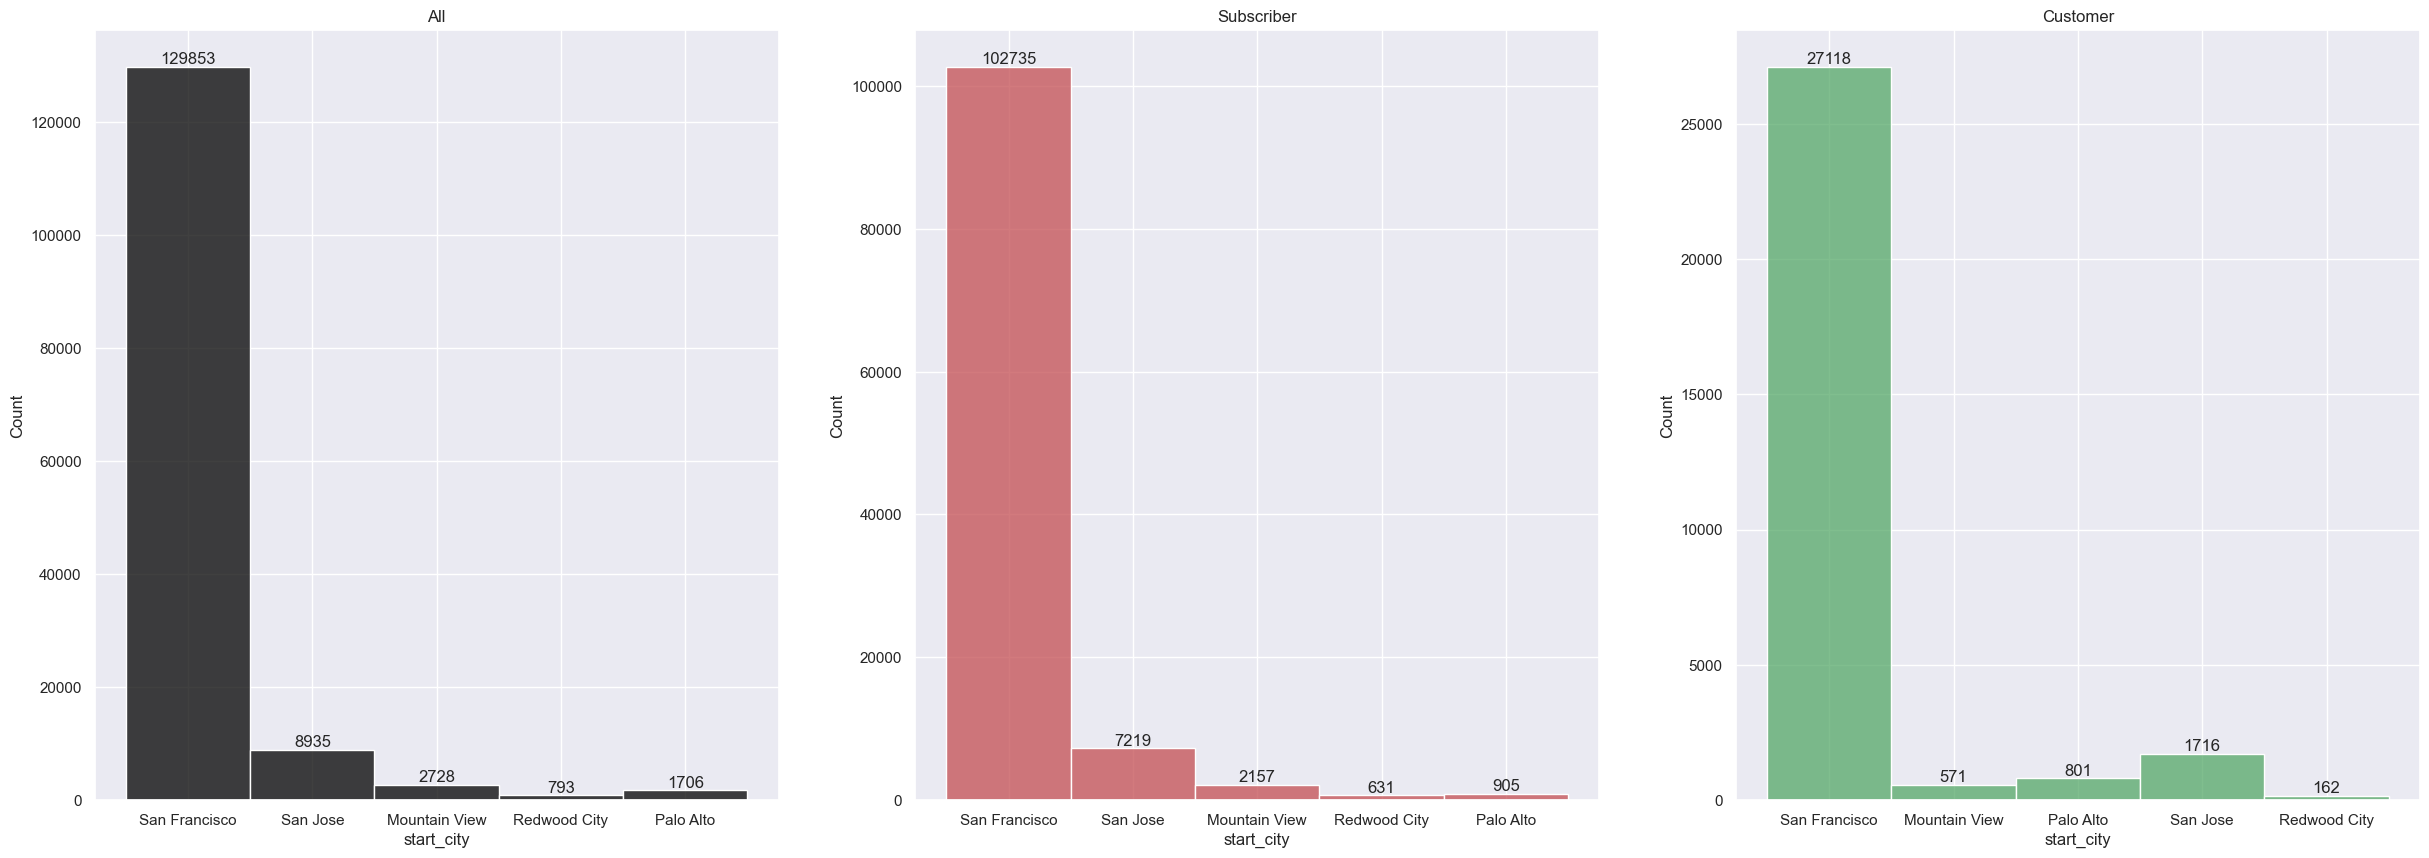

In [87]:
fig, axes = plt.subplots(1,3, figsize = (30,10))

ax = sns.histplot(ax = axes[0],data = trip_summarised, x="start_city", multiple="stack",color = 'black')
axes[0].set_title("All")
for label in ax.containers:
    ax.bar_label(label)
ax = sns.histplot(ax = axes[1],data = trip_summarised.where(trip_summarised['subscription_type'] == "Subscriber"), x="start_city", multiple="stack", color = 'r')
axes[1].set_title("Subscriber")

for label in ax.containers:
    ax.bar_label(label)
ax =sns.histplot(ax = axes[2],data = trip_summarised.where(trip_summarised['subscription_type'] == "Customer"), x="start_city", multiple="stack",color = 'g')
axes[2].set_title("Customer")

for label in ax.containers:
    ax.bar_label(label)
plt.show()

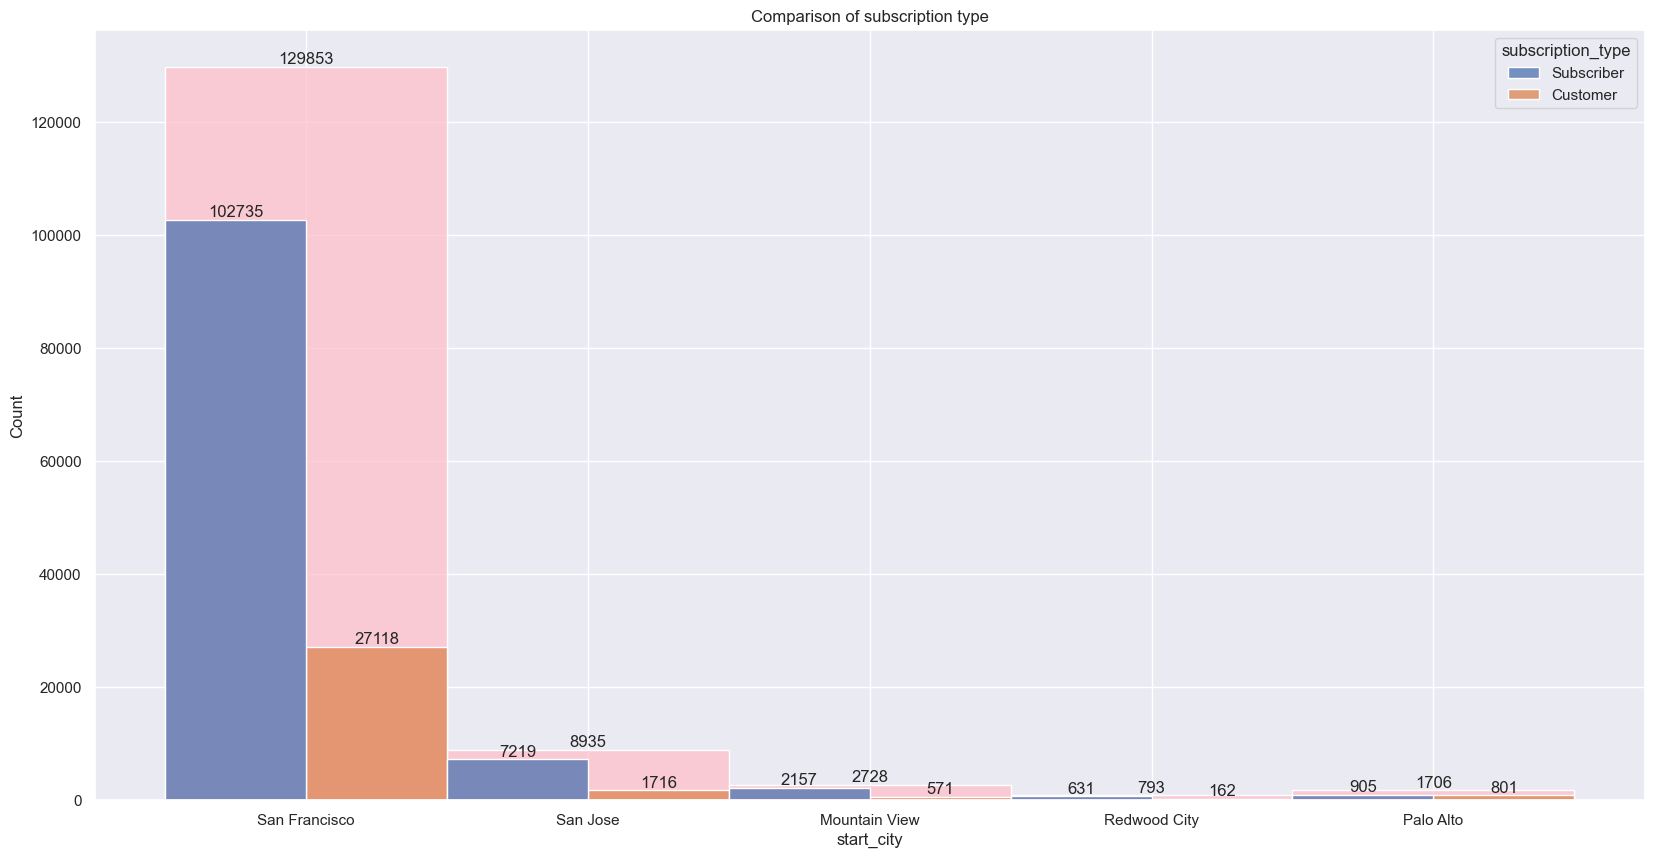

In [88]:
ax= sns.histplot(data = trip_summarised, x="start_city", color = "pink")
sns.histplot(data = trip_summarised, x="start_city", multiple="dodge", hue = 'subscription_type').set_title("Comparison of subscription type")

sns.set(rc = {'figure.figsize':(20,10)})
for label in ax.containers:
    ax.bar_label(label)


plt.show()

# When is Bay Area Bike Share used?

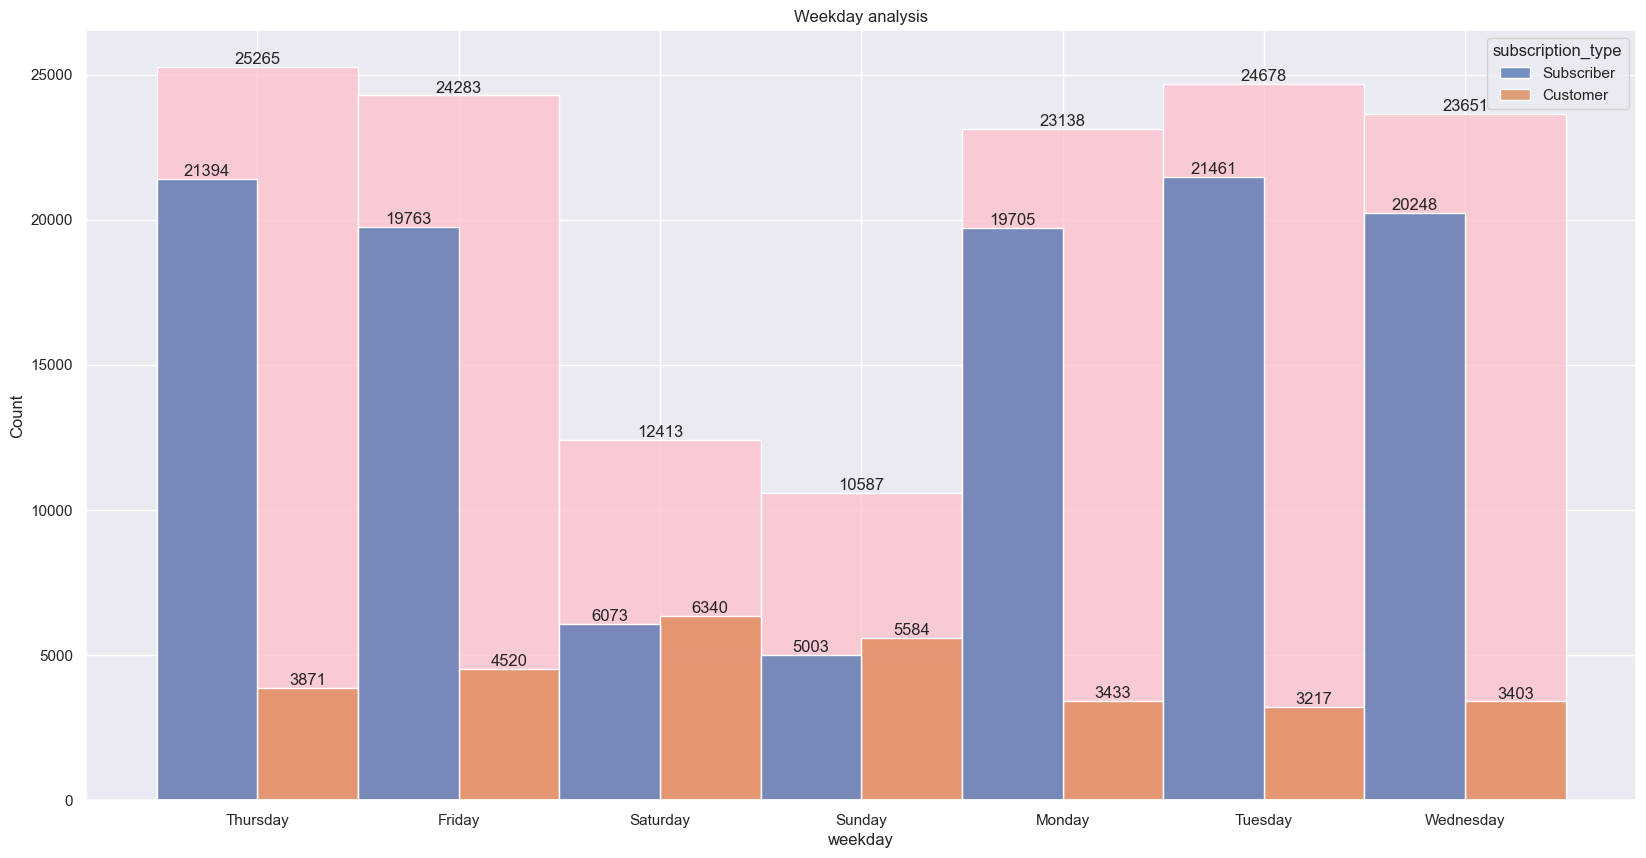

In [89]:
sns.histplot(data = trip_summarised, x="weekday", multiple="dodge",color="pink").set_title("Weekday analysis")
ax = sns.histplot(data = trip_summarised, x="weekday", multiple="dodge", hue = 'subscription_type')
for label in ax.containers:
    ax.bar_label(label)
plt.show()


***We can see, people tend to use motorbike services on weekdays instead of weekends. According to the weekly data chart, the highest is on Thursday and the lowest is on Sunday. Weekday riders are overwhelmingly subscribers, and ridership among subscribers falls on weekends so that rides by customers just manage to outnumber them.***

{'Monday': 23138, 'Tuesday': 24678, 'Wednesday': 23651, 'Thursday': 25265, 'Friday': 24283, 'Saturday': 12413, 'Sunday': 10587}


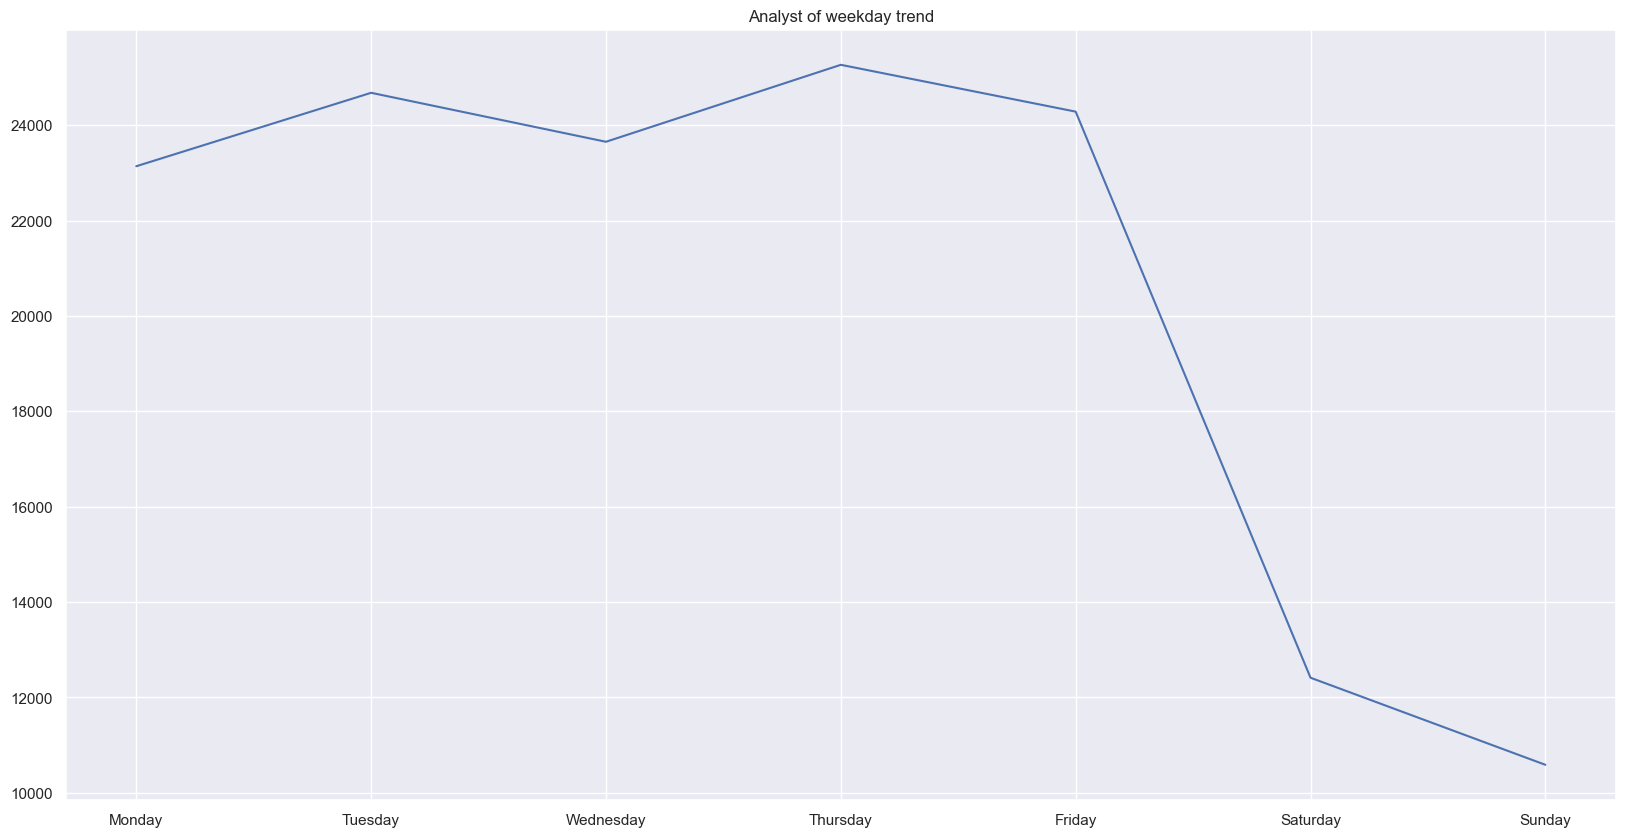

In [90]:
weekdays = ["Monday",
"Tuesday",
"Wednesday",
"Thursday",
"Friday",
"Saturday",
"Sunday"]
weekday_data = {}
for weekday in weekdays:
    weekday_data[weekday] = trip_summarised['tripID'].where(trip_summarised['weekday'] == weekday).count()
print(weekday_data)
sns.lineplot(data = weekday_data).set(title = "Analyst of weekday trend")
plt.show()

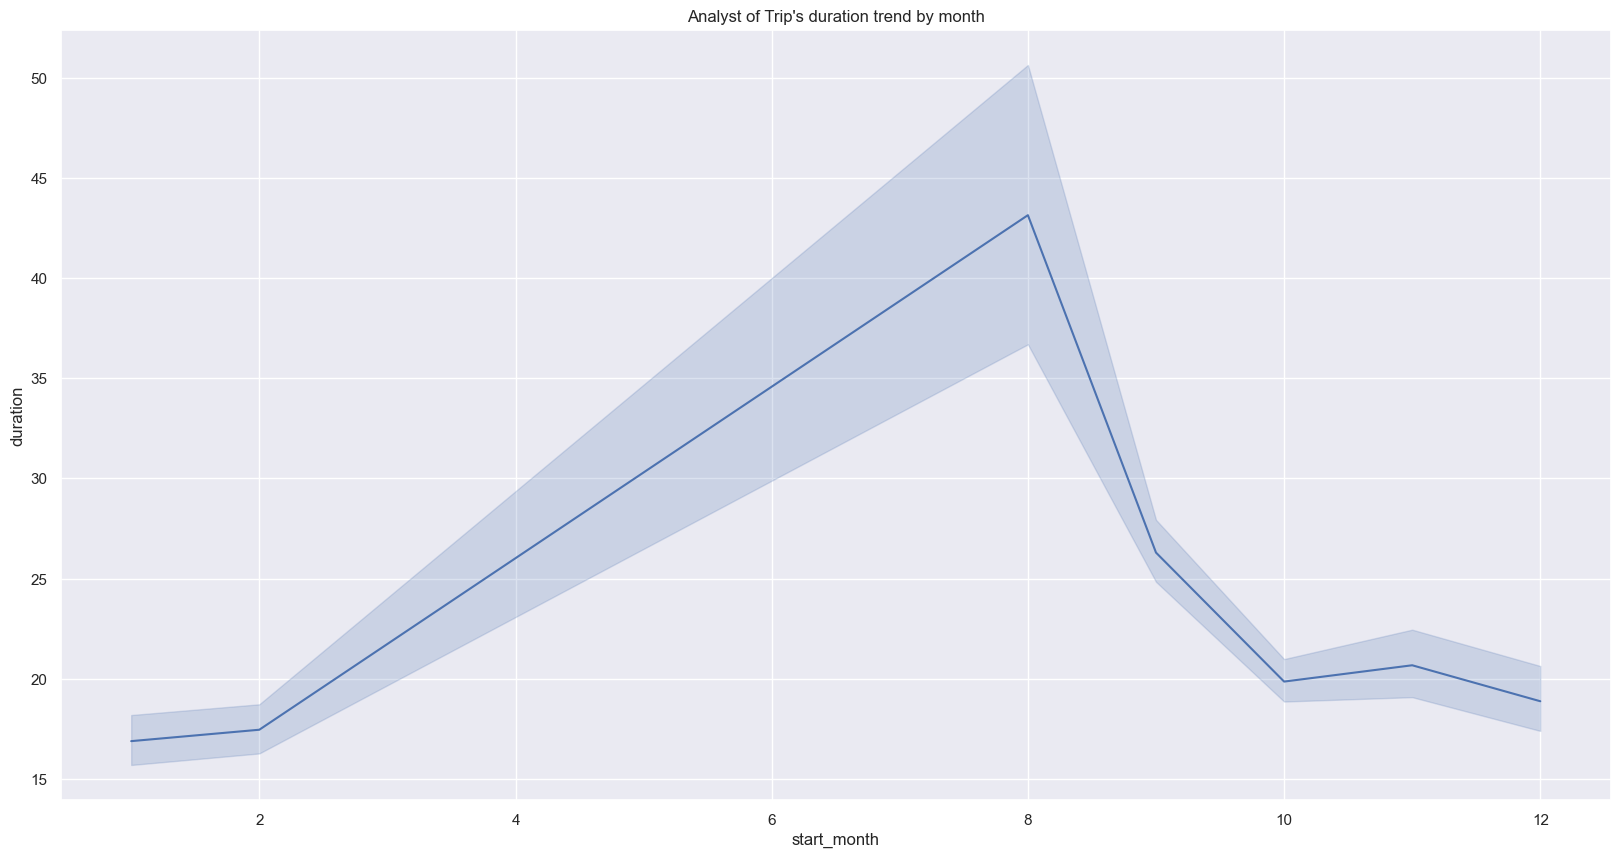

In [91]:
sns.lineplot(data = trip_summarised, x = 'start_month',y =  'duration').set(title = "Analyst of Trip's duration trend by month")
plt.show() 

In [92]:
trip_summarised['duration']

0            1.050000
1            1.166667
2            1.183333
3            1.283333
4            1.383333
             ...     
144010       6.416667
144011       2.416667
144012      11.283333
144013    1068.800000
144014       9.500000
Name: duration, Length: 144015, dtype: float64

[Text(0.5, 1.0, "Analyst of Trip's duration trend by weekday")]

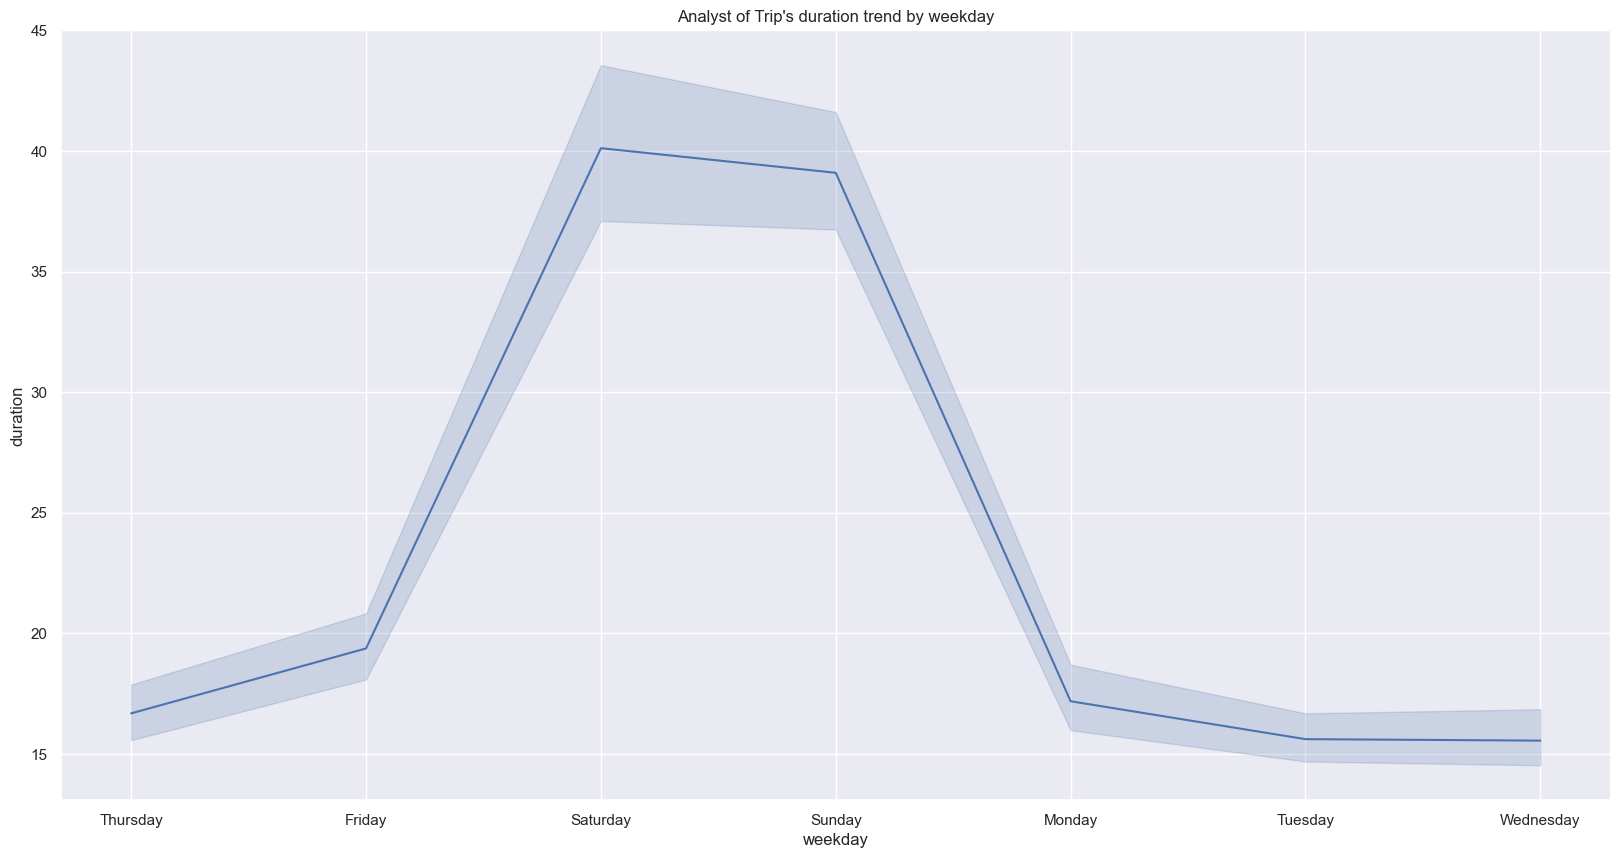

In [93]:
sns.lineplot(data = trip_summarised, x = 'weekday',y =  'duration').set(title = "Analyst of Trip's duration trend by weekday")

We can see. Although the number of visitors on weekends is very low, the playing time of these days is significantly increased compared to weekdays. The highest is belong to Saturday and the lowest is Wednesday.

# Conclusion

We saw here that Bike Share is used mostly in San Francisco, in Thursday and August. 

The popularity of each station among subscribers as opposed to customers was one dimension that was not examined in this analysis. We were able to determine which stations were more in demand among commuters or tourists and, perhaps, whether parts of the city had a need for additional stations based on what we observed about customer behavior compared to that of subscribers.

All about issues we want to know is solved:

- Issue 1: Exploring which ***Subscription type*** is the most use our service.
    
    The most Subscription type which use most service is: Subscriber
    
- Issue 2: Exploring, Statistics of trip durations.
    
    ```markdown
    The average duration of trips is 20.515169 minutes.
    
    - The median trip duration is 8.85 minutes.
    
    - People most make a trip in 6.05 minutes.
    
    - There is no relationship of 2 values: duration and quantity of trip because 
    the trip can be max in the mid of week but the longest average duration is belong to weekend.
    ```
    
- Issue 3: Analysis of ***Subscription type in weekday***
- Issue 4: Draw plot to describe trend of quantity of visitor through weekday. Which is the day that we have most vistors?